# Dimensionality

* https://medium.com/mlearning-ai/the-only-3-python-cheatsheet-you-need-as-a-beginner-data-scientist-7547cf70f3c1

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


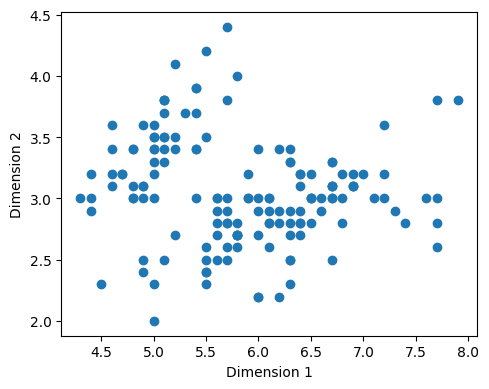

In [ ]:
# plot 2 dimensions, https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

print(df.head())

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

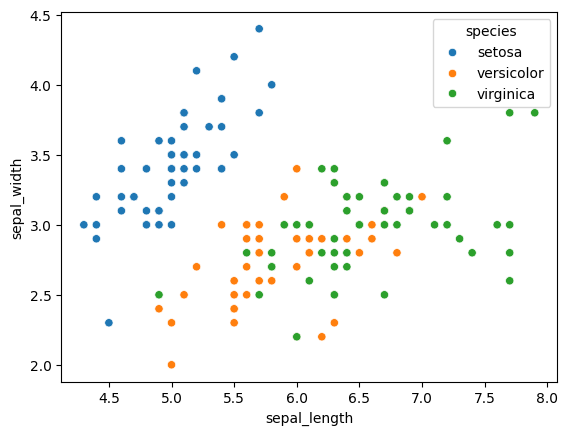

In [ ]:
# add hue as a third dimension, https://www.educba.com/seaborn-scatter-plot/
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = sns.load_dataset("iris")
sns.scatterplot(x="sepal_length", y="sepal_width", hue = 'species', data=iris_data)

In [ ]:
# !pip install plotly

In [ ]:
# check version
import plotly
plotly.__version__

'5.15.0'

In [ ]:
# plot 3 dimensions
import plotly.express as px

df = px.data.iris()

fig = px.scatter_3d(df, x = 'sepal_width',
                    y = 'sepal_length',
                    z = 'petal_width',
                    color = 'species')

fig.show()

In [ ]:
# 5 dimensions, https://www.geeksforgeeks.org/3d-scatter-plot-using-plotly-in-python/
import plotly.express as px

df = px.data.iris()

fig = px.scatter_3d(df, x = 'sepal_width',
                    y = 'sepal_length',
                    z = 'petal_width',
                    color = 'species',
                    size='petal_length',
                    size_max = 20,
                    opacity = 0.5)

fig.show()

# Dimensionality Reduction

https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b

* 1 Dimension: Point
* 2 Dimensions: Line / Plane
* 3 Dimensions: Cube

## The Curse of Dimensionality

The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. The expression was coined by Richard E. Bellman when considering problems in dynamic programming. Dimensionally cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

https://en.wikipedia.org/wiki/Curse_of_dimensionality

## Dimensionality Reduction

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with). Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics.

https://en.wikipedia.org/wiki/Dimensionality_reduction

## Principal Component Analysis - PCA (unsupervised)

PCA is considered unsupervised while LDA is supervised because it uses the dependent variable.

* Represent data with a smaller set of features while keeping most of the variance
* Discovers the correlation between variables (least squares)
* https://setosa.io/ev/principal-component-analysis/
* Good for multicollinearity
* Train (fit) on X

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data.

https://en.wikipedia.org/wiki/Principal_component_analysis

More readings:

* https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* https://towardsdatascience.com/machine-learning-part-15-dimensionality-reduction-with-principal-component-analysis-a5b3bb7353bc
* https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
* https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=42)
columns = X_train.columns
print(X_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4                  5.0               3.6                1.4               0.2
32                 5.2               4.1                1.5               0.1
142                5.8               2.7                5.1               1.9
85                 6.0               3.4                4.5               1.6
86                 6.7               3.1                4.7               1.5


In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

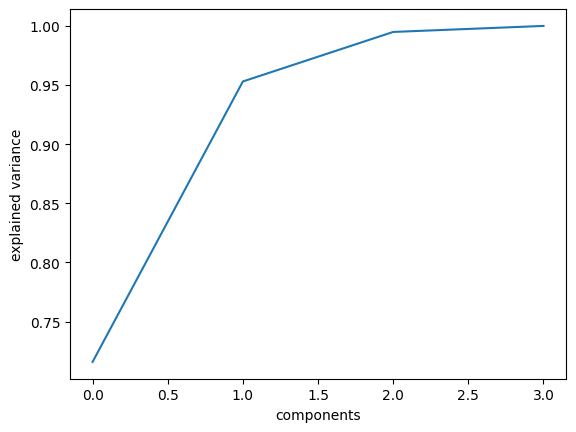

In [ ]:
# plot explained variance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = PCA(n_components = 4)
model.fit_transform(X_train)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('explained variance');

In [ ]:
# reduce dimensions
import pandas as pd
from sklearn.decomposition import PCA

model = PCA(n_components = 2)
X_train = model.fit_transform(X_train) # unsupervised
X_test = model.transform(X_test)

# feature importance or influence (weights)
print(pd.DataFrame(model.components_, columns=columns, index = ['PC-1', 'PC-2']))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.522766         -0.245027           0.586195          0.568378
PC-2          -0.368870         -0.928071          -0.010378         -0.050119


Features 1, 3, and 4 are important for PC-1 and feature 2 has the highest value for PC-2

In [ ]:
# PVE proportion of variance explained
print(model.explained_variance_ratio_)

[0.71581797 0.23720827]


Read the following for another look at PCA on a dataset with more features and how to choose components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [ ]:
# build and evaluate supervised classification model using PCA X_train and original y_train
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {accuracy_score(y_test, predictions)}')

[[15  0  0]
 [ 0  9  2]
 [ 0  1 11]]
Training Score: 0.9107142857142857
Test Score: 0.9210526315789473


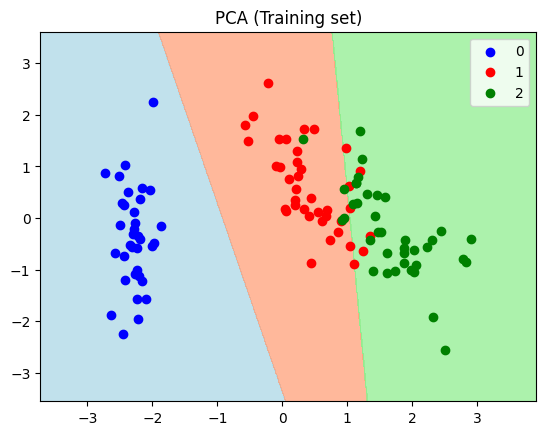

In [ ]:
# plot train set
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightsalmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red', 'green'))(i), label = j)

plt.title('PCA (Training set)')
plt.legend()
plt.show()

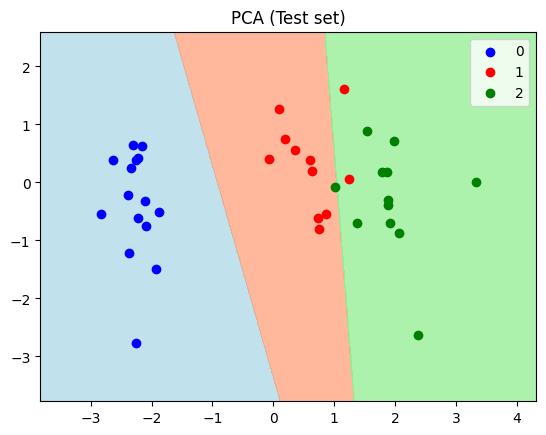

In [ ]:
# plot test set
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightsalmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red', 'green'))(i), label = j)

plt.title('PCA (Test set)')
plt.legend()
plt.show()

## Linear Discriminant Analysis - LDA


### 1. Core Goal and Mechanism

LDA is a generalization of Fisher's linear discriminant. Its core goal is to find an optimal linear transformation of the features:

* **Find Component Axes:** LDA identifies a new set of dimensions (component axes).
* **Maximize Separation:** The method explicitly seeks a linear combination of features that **maximizes the separation between multiple classes** of objects or events.
* **Application:** The resulting combined features can be used as a **linear classifier** or, more commonly, to **reduce dimensionality** before subsequent classification (e.g., feeding the reduced data into a $k$-Nearest Neighbors or Logistic Regression model).
* **Training:** Like other supervised methods, the model must be trained (fit) on both the features ($\mathbf{X}$) and the class labels ($\mathbf{y}$).

***

### 2. Relationship to Other Statistical Methods

LDA is often compared to other linear modeling and dimensionality reduction techniques:

#### LDA vs. Analysis of Variance (ANOVA)

While both LDA and ANOVA use linear combinations of variables, their structures are inverted:

* **ANOVA:** Uses **categorical independent variables** (factors) to predict a **continuous dependent variable**.
* **LDA (Discriminant Analysis):** Uses **continuous independent variables** (features) to predict a **categorical dependent variable** (the class label).

#### LDA vs. Principal Component Analysis (PCA)

LDA is closely related to PCA, as both look for linear combinations of variables. However, their objectives are fundamentally different:

| Feature | Linear Discriminant Analysis (LDA) | Principal Component Analysis (PCA) |
| :--- | :--- | :--- |
| **Objective** | **Explicitly models class differences**; finds axes that maximize separation *between* classes. | **Does not consider class differences**; finds axes that maximize overall data variance. |
| **Method Type** | **Supervised** (requires $\mathbf{y}$ labels). | **Unsupervised** (does not require $\mathbf{y}$ labels). |

This means that while PCA finds the directions where the data is most spread out, **LDA finds the directions that are best for distinguishing between known groups.**

#### LDA vs. Logistic Regression

LDA is similar to Logistic Regression in that both explain a **categorical variable** by the values of **continuous independent variables**. However, LDA assumes that the independent variables are **normally distributed** and that the class covariances are equal. When these assumptions are not reasonable, Logistic Regression is often the preferred method.
https://en.wikipedia.org/wiki/Linear_discriminant_analysis

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=42)
columns = X_train.columns
print(X_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4                  5.0               3.6                1.4               0.2
32                 5.2               4.1                1.5               0.1
142                5.8               2.7                5.1               1.9
85                 6.0               3.4                4.5               1.6
86                 6.7               3.1                4.7               1.5


In [ ]:
# code example
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train) # supervised
X_test = lda.transform(X_test)

In [ ]:
# create model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {accuracy_score(y_test, predictions)}')

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Training Score: 0.9821428571428571
Test Score: 1.0


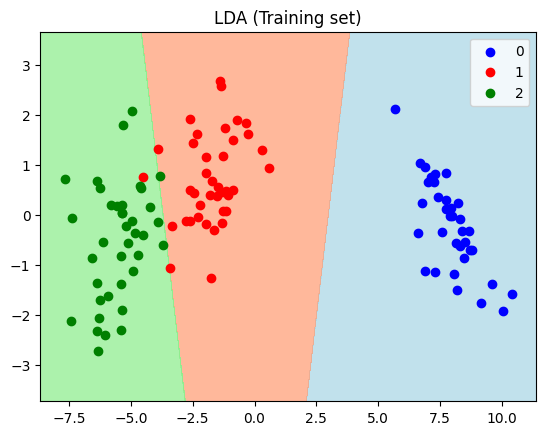

In [ ]:
# plot train set
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightsalmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red', 'green'))(i), label = j)

plt.title('LDA (Training set)')
plt.legend()
plt.show()

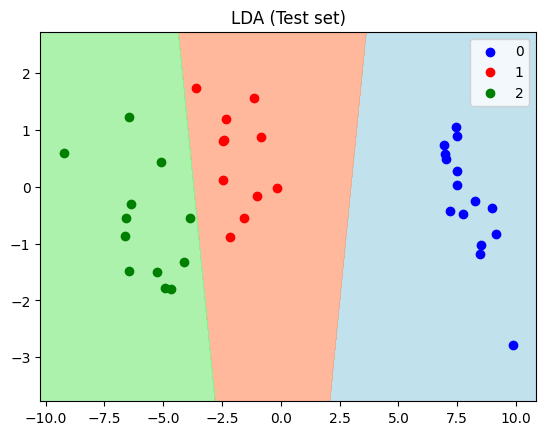

In [ ]:
# plot test set
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightsalmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red', 'green'))(i), label = j)
plt.title('LDA (Test set)')
plt.legend()
plt.show()

## Singular Value Decompostion

* Used for dimensionality reduction, image compression, denoising data, image recovery, removing background noise
* Matrix can be represented as the product of three matrices - $A_{nn} = U_{np} S_{np} V^T_{pp}$
* where n = rows and p = dimensions
* S is the diagonal matrix of singular values, importance values of each of the features
* Eigenvectors of a matrix are directions of maximum spread or variance of data
* Decomposes a matrix into several component matrices

Readings:

* https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/
* https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0
* https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/
* https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* Constructs a probability distribution for high-dimensional samples
* Projects high-dimensional data points into 2D/3D by inducing the projected data to have a similar distribution as the original dataset
* Similar samples have a high likelihood of being picked
* Dissimilar points have and extremely small likelihood of being picked

Readings

* https://plotly.com/python/t-sne-and-umap-projections/
* https://towardsdatascience.com/t-sne-python-example-1ded9953f26
* https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c
* https://www.learndatasci.com/tutorials/applied-dimensionality-reduction-techniques-using-python/

In [ ]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=42, init='random', learning_rate='auto')
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

## Isomap Embedding

A technique that combines several different algorithms, enabling it to use a non-linear way to reduce dimensions while preserving local neighborhoods

https://towardsdatascience.com/isomap-embedding-an-awesome-approach-to-non-linear-dimensionality-reduction-fc7efbca47a0

## Locally Linear Embedding

Tries to reduce n-Dimensions while preserving the geometric features of the original non-linear feature structure or relationships between neighborhoods

https://docs.google.com/document/d/1J9rjTzv3VKB2Qq10P3Oq2mV_K8pJOSdaeJ3IImPszBA/edit

## Modified Locally Linear Embedding

An extension fo Locally Linear Embedding that creates multipl weighting vectors for each neighborhood

https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

## Kernel PCA

* Creates a new space of dimensions
* Non-linear dimensionality reduction through the use of kernels
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

### SVC with Kernel Trick

* https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png (https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d)
* Non linear
* Maps classes to different dimensions
* https://vitalflux.com/machine-learning-svm-kernel-trick-example/
* Example - exponential curve can be used to make something linearly separable
* The kernel trick

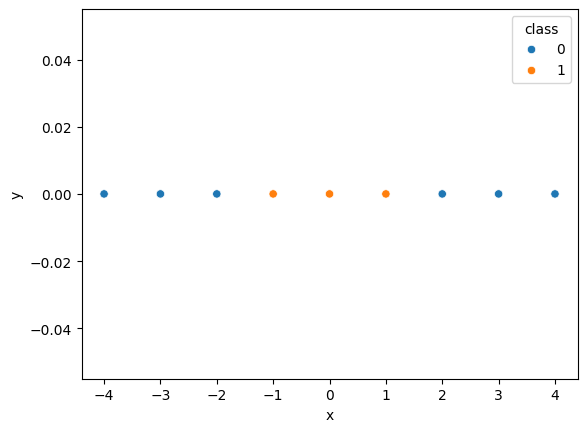

In [ ]:
# svm kernel trick review
import pandas as pd
import seaborn as sns

x = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
y = [0, 0, 0, 0, 0, 0, 0, 0, 0]
target = [0, 0, 0, 1, 1, 1, 0, 0, 0]
d = {'x': x, 'y': y, 'class': target}
df = pd.DataFrame(d)
sns.scatterplot(data=df, x='x', y='y', hue='class');

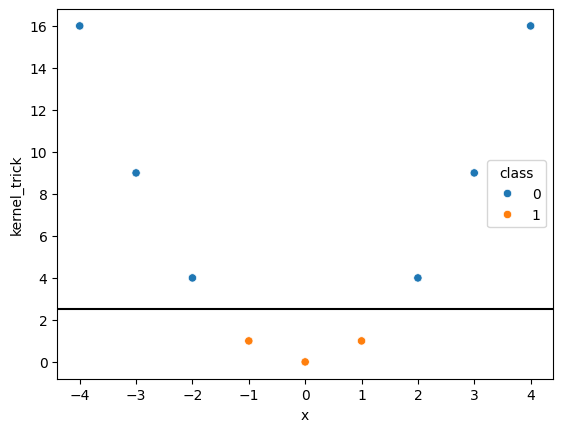

In [ ]:
# y = x**2
import numpy as np

df['kernel_trick'] = df['x']**2
sns.scatterplot(data=df, x='x', y='kernel_trick', hue='class')
plt.axhline(y=2.5, color='k')
plt.show()

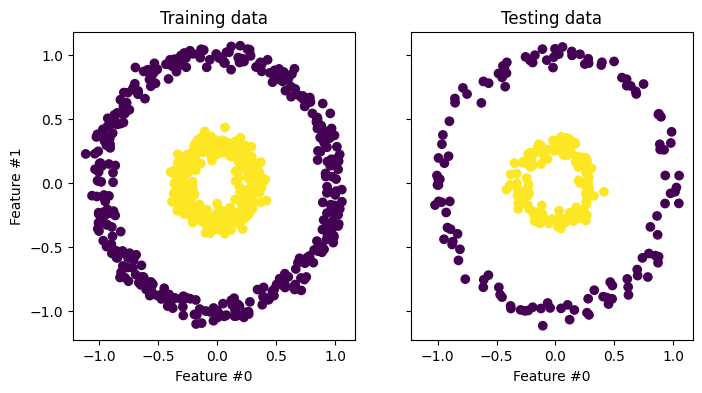

In [ ]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")


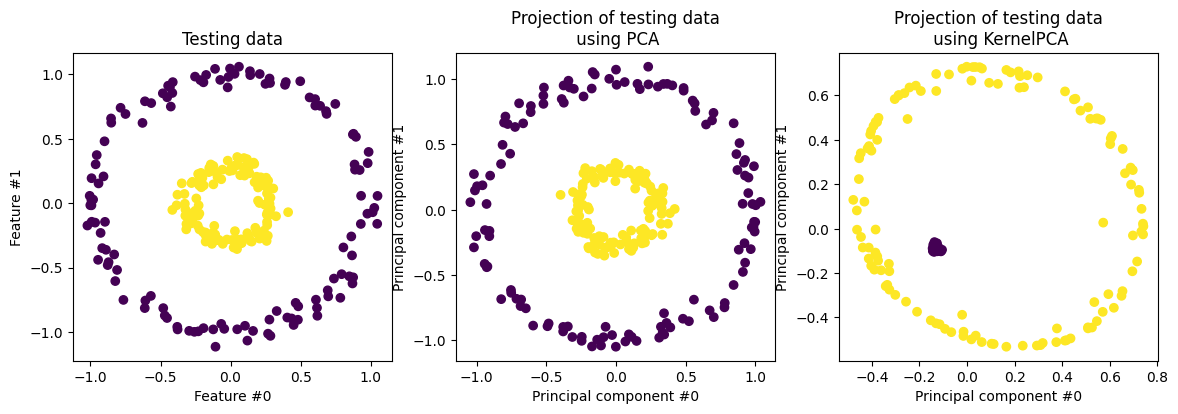

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [ ]:
import plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train, mode='markers', marker=dict(size=5))])
fig.show()

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=42)

In [ ]:
# build our pca kernel
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [ ]:
# build and evaluate model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
accuracy_score(y_test, predictions)

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


0.9736842105263158

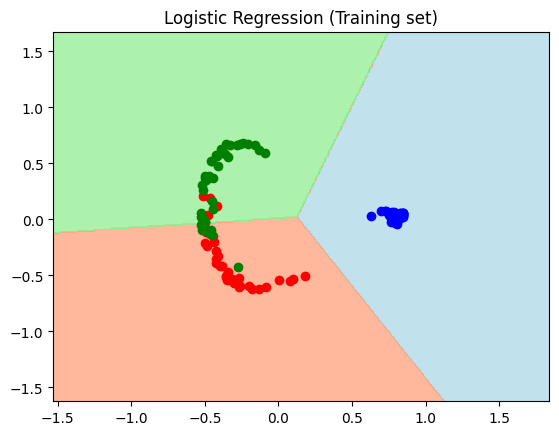

In [ ]:
# plot train set
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightsalmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.show()

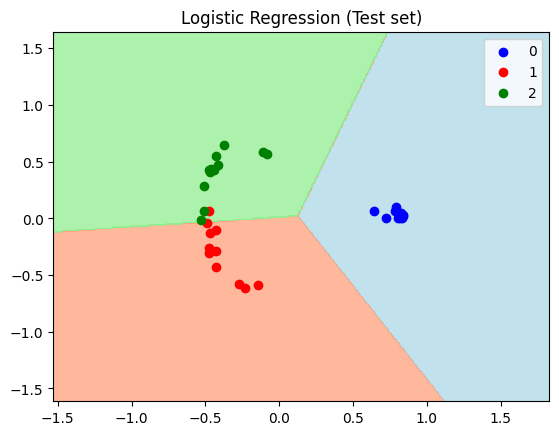

In [ ]:
# plot test set
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightsalmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.legend()
plt.show()

## Challenge

Try other kernels. This one uses rbf, radial based function.

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
* https://github.com/syamkakarla98/Kernel-PCA-Using-Different-Kernels-With-Classification